<a href="https://colab.research.google.com/github/zhrnovanka/ADM-Case-04-GLM/blob/main/GLM_Kelompok_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Case Study 4**
#**Kelompok A**

Anggota:
1. Vania Adisaputri (1906296362)
2. Cindy Fara Nabila (2006463774)
3. Rizqa Fatika (1906306054)
4. Keisha Janita (2006571021)
5. Karin Marshanda (1906299515)
6. Zahra Novanka (1806185834)
7. Angelina Putri (2006464152)
8. Zhafirah Tsany (2006572951)

# PENDAHULUAN

Data ini diambil dari ASHRAE dan berisi tentang penggunaan 4 energi yang berbeda pada gedung-gedung di beberapa wilayah dalam satu tahun. Beberapa variabel yang ada di dalam data adalah sebagai berikut:
* meter_reading - Variabel target yaitu energi yang digunakan dalam kWh.
* primary_use - Penggunaan gedung sehari-hari
* square_feet - Luas lantai gedung
* year_built - Tahun gedung dibuka
* floor_count - Jumlah lantai
* air_temperature - Suhu Udara (Derajat Celsius)
* cloud_coverage - Jumlah awan yang menutupi langit (Oktas)
* dew_temperature - Suhu Embun (Derajat Celsius)
* precip_depth_1_hr - Presipitasi Air Hujan (Millimeter)
* sea_level_pressure - Millibar/hectopascals
* wind_direction - Arah Angin berdasarkan Compass direction (0-360)
* wind_speed - Kecepatan angin (m/s)


# PERMASALAHAN
Akan dilihat bagaimana hubungan antara variabel target, yaitu energi yang digunakan dalam kWh (meter reading) dengan variabel-variabel lain yang mempengaruhi.

**Import Data**

In [ ]:
import pandas as pd

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


**Cek Duplikasi**

In [ ]:
print(df.duplicated().sum())

0


**Drop dua kolom yang tidak diperlukan**

In [ ]:
df.drop("floor_count",axis=1,inplace=True)
df.drop("year_built",axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   air_temperature     1413 non-null   float64
 4   cloud_coverage      1396 non-null   float64
 5   dew_temperature     1413 non-null   float64
 6   precip_depth_1_hr   1237 non-null   float64
 7   sea_level_pressure  1324 non-null   float64
 8   wind_direction      1413 non-null   float64
 9   wind_speed          1413 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 110.5+ KB


Interpretasi drop kolom

Kedua kolom tersebut didrop karena jumlah NaN lebih dari setengah dari jumlah baris dari keseluruhan dataframe. Selain itu, jika tidak dihapus ada resiko munculnya bias. 

**Menghapus data yang memiliki missing value**

In [ ]:
df.dropna(inplace=True)

**Menghapus Outlier**

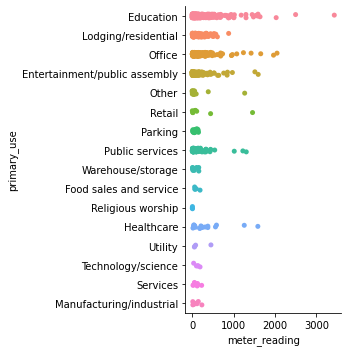

In [ ]:
import seaborn as sns
p= sns.catplot(x="meter_reading", y="primary_use", data=df)

In [ ]:
import numpy as np
ilangin_outlier = np.abs(df.meter_reading - df.meter_reading.mean())<=(2*df.meter_reading.std())

In [ ]:
df_tanpaoutlier = df[ilangin_outlier]

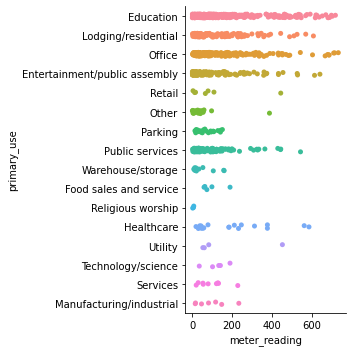

In [ ]:
p= sns.catplot(x="meter_reading", y="primary_use", data=df_tanpaoutlier)

Menghapus outlier

Variabel meter_reading akan menjadi variabel respon dari regresi sehingga kami menghapus outlier berdasarkan variabel tersebut. Penggunaan catplot dengan primary_use untuk memudahkan visualisasi deteksi outlier.

**Histogram Data Cuaca**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49ebbf3d50>]],
      dtype=object)

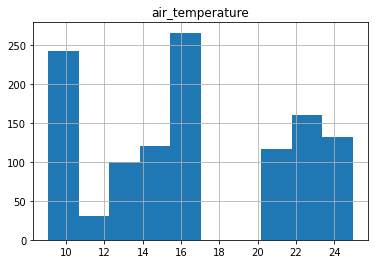

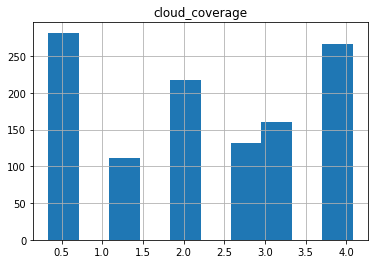

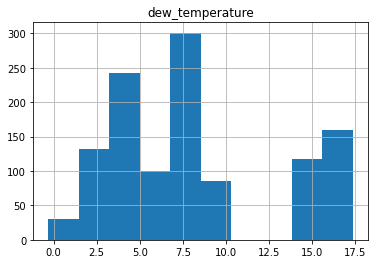

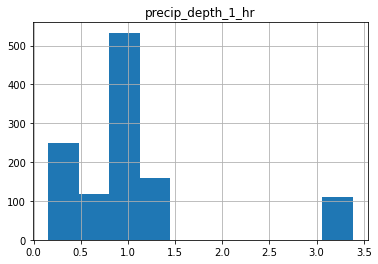

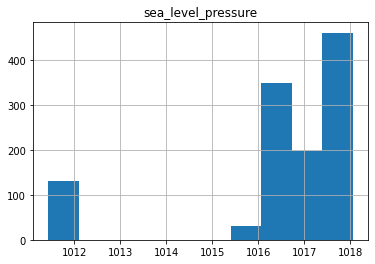

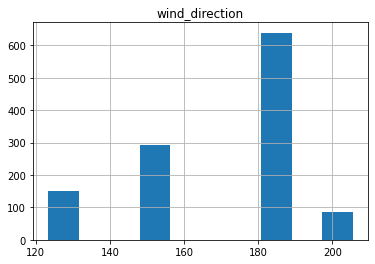

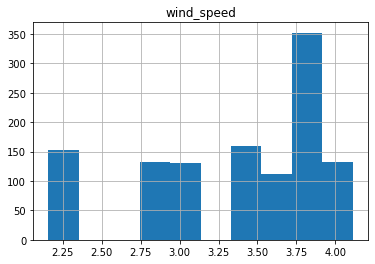

In [ ]:
df_tanpaoutlier.hist('air_temperature')
df_tanpaoutlier.hist('cloud_coverage')
df_tanpaoutlier.hist('dew_temperature')
df_tanpaoutlier.hist('precip_depth_1_hr')
df_tanpaoutlier.hist('sea_level_pressure')
df_tanpaoutlier.hist('wind_direction')
df_tanpaoutlier.hist('wind_speed')

**Frekuensi Bangunan Berdasarkan Jenis Penggunaan**

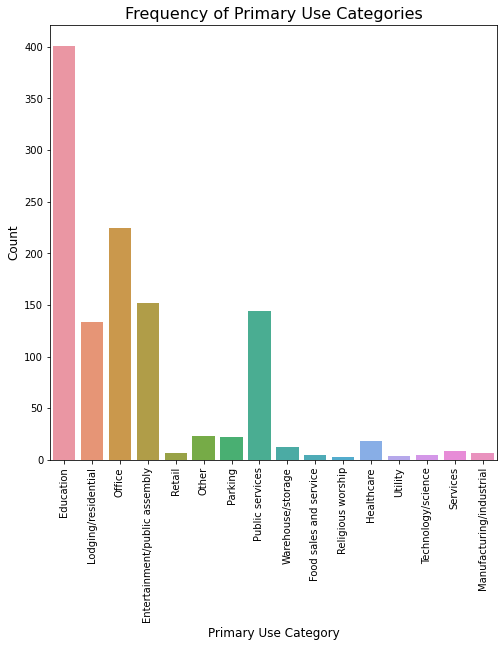

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'primary_use', data = df_tanpaoutlier).set_title("Frequency of Primary Use Categories", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Primary Use Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Berdasarkan visualisasi di atas, didapatkan bahwa:
* Bangunan untuk pendidikan memiliki frekuensi tertinggi dibandingkan bangunan-bangunan lainnya.
* Bangunan untuk ibadah memiliki frekuensi terendah dibandingkan dengan bangunan-bangunan lainnya.

**Kasus Rata-rata Penggunaan Energi berdasarkan Primary Use**

In [ ]:
df2 = df_tanpaoutlier.groupby(['primary_use'])
df2 = df2['meter_reading'].mean().reset_index()

df2

,primary_use,meter_reading
0,Education,169.621909
1,Entertainment/public assembly,95.890303
2,Food sales and service,96.372528
3,Healthcare,202.030921
4,Lodging/residential,128.859881
5,Manufacturing/industrial,93.583312
6,Office,137.122694
7,Other,41.336402
8,Parking,72.326071
9,Public services,79.462078


Hasil dari data diatas dihasilkan untuk fasilitas Layanan Kesehatan menggunakan rata-rata energi paling tinggi diantara fasilitas yang lainnya.

###**Korelasi dan Regresi**

In [ ]:
import statsmodels.formula.api as smf 
from statsmodels.formula.api import ols 
import statsmodels.api as sm, scipy.stats as stats 
import matplotlib.pyplot as plt

Kami akan mencari korelasi antar variabel yang digunakan. Korelasi tidak mengimplikasikan hubungan sebab akibat, namun korelasi bertujuan untuk mengetahui seberapa kuat hubungan antar variabel dependen dan variabel independen.

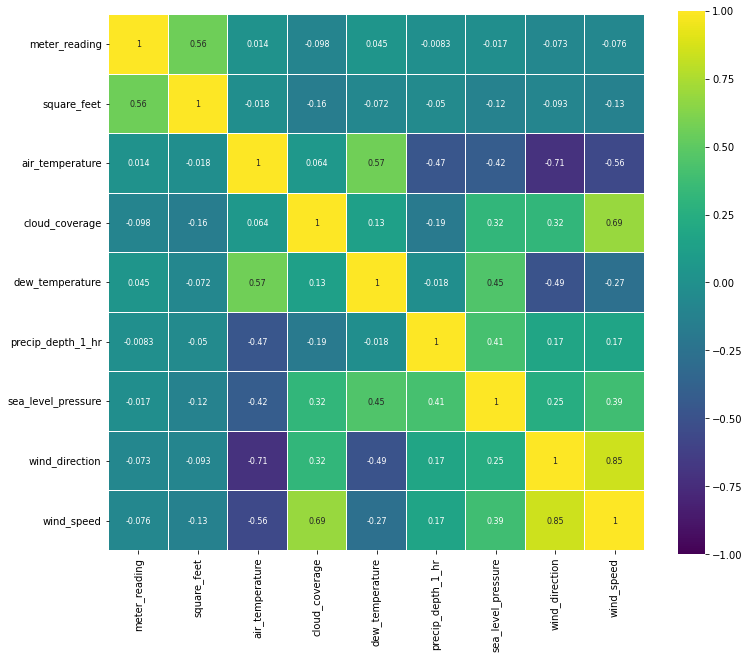

In [ ]:
corr2=df_tanpaoutlier.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr2, 
 cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, 
 annot=True, annot_kws={"size": 8}, square=True); 

Untuk mengetahui variabel-variabel mana saja yang mempengaruhi variabel target (meter_reading), kami menggunakan metode forward selection. Metode tersebut memasukkan satu per satu variabel-variabelnya. Lalu, variabel yang tidak mempengaruhi model secara signifikan, tidak digunakan dalam model tersebut.

In [ ]:
import statsmodels.formula.api as smf


def forward_selected(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

Berikut adalah model regresi berdasarkan metode forward selection. Model ini menggunakan seluruh variabel dari data df_tanpaoutlier. Koefisien yang kami peroleh sebesar 0.4207.

In [ ]:
model=forward_selected(df_tanpaoutlier, 'meter_reading')
print(model.model.formula) 
print(model.rsquared_adj) 

meter_reading ~ square_feet + primary_use + dew_temperature + wind_speed + wind_direction + cloud_coverage + air_temperature + sea_level_pressure + precip_depth_1_hr + 1
0.4207532685490618


In [ ]:
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     37.89
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          2.55e-123
Time:                        08:31:12   Log-Likelihood:                -7179.8
No. Observations:                1169   AIC:                         1.441e+04
Df Residuals:                    1145   BIC:                         1.453e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# **Kesimpulan:**
Dari hasil summary di atas, berdasarkan nilai R Squared yang didapatkan, variabel independen dapat menjelaskan 43,07%. Angka tersebut tidak lebih besar dari 0.5, namun cukup mampu menggambarkan seberapa baik model yang dibentuk.
Terlihat pula bahwa variabel yang memiliki p-value < 0.05 adalah square_feet, wind_speed, wind_direction, cloud_coverage, air_temperature, dan sea_level_pressure. Dikarenakan p-value < 0.05, maka H0 ditolak. Dengan kata lain, variabel yang telah disebabkan sebelumnya mempengaruhi pembacaan energi listrik (meter_reading).

# **Rekomendasi**


1.   Melakukan inputasi data dengan baik karena terdapat dua variabel dengan missing value lebih dari 50%
2.   Menambah variabel 'jumlah barang elektronik yang digunakan' (seperti lampu, ac, kipas, dan lainnya) sehingga dapat lebih tergambar meter_reading
3.   Memberikan subsidi lebih untuk bidang Healthcare dan Education, karena penggunaan listrik berdasarkan meter_reading paling banyak di bidang tersebut dibandingkan bidang lain


